<a href="https://colab.research.google.com/github/abrehamgezahegn/ConvertIT/blob/master/Lin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt


tf.__version__


'2.4.1'

In [ ]:

data = load_breast_cancer()
print(data.data.shape)
print(data.keys())
print("target" , data.target.shape)


np.isnan(data.data).sum(axis=0)

data.feature_names

(569, 30)
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
target (569,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
df = pd.DataFrame(data.data)
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
dtype: object

In [ ]:
X, y = data.data , data.target
X.shape

(569, 30)

In [ ]:
X_train,X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_test.shape

(171, 30)

In [ ]:
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train);
X_test = scaler.transform(X_test);

In [ ]:

N,D = X.shape

model = tf.keras.models.Sequential([ 
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)



Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 1.1590 - accuracy: 0.3443 - val_loss: 1.0189 - val_accuracy: 0.3918
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 1.0935 - accuracy: 0.4036 - val_loss: 0.9153 - val_accuracy: 0.4444
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.9884 - accuracy: 0.4276 - val_loss: 0.8227 - val_accuracy: 0.5322
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.8060 - accuracy: 0.4843 - val_loss: 0.7422 - val_accuracy: 0.5789
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7985 - accuracy: 0.5139 - val_loss: 0.6714 - val_accuracy: 0.6316
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7216 - accuracy: 0.5665 - val_loss: 0.6099 - val_accuracy: 0.6491
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.5621 - val_loss: 0.5580 - val_accuracy: 0.7018
Epoch 8/100


In [ ]:
print("Train score",  model.evaluate(X_train , y_train))
print("Test score" , model.evaluate(X_test , y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9849
Train score [0.09500366449356079, 0.9849246144294739]
6/6 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9591
Test score [0.12752489745616913, 0.9590643048286438]


In [ ]:
r.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

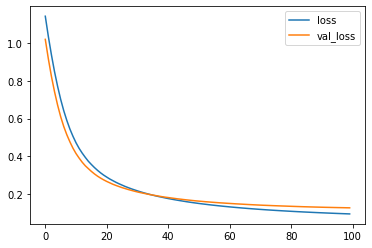

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

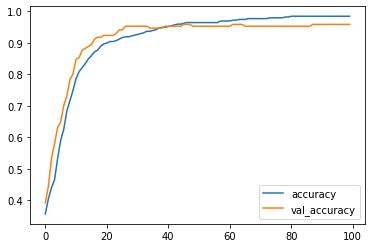

In [ ]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [ ]:
prediction = model.predict(X_test)
prediction

array([[3.27365228e-06],
       [9.69875515e-01],
       [9.97957706e-01],
       [4.67330217e-04],
       [1.81508839e-01],
       [9.90614593e-01],
       [9.63134050e-01],
       [8.97805393e-01],
       [6.78043485e-01],
       [2.03141570e-03],
       [9.86673415e-01],
       [7.59008229e-01],
       [5.47189415e-01],
       [5.82840741e-02],
       [2.63741732e-01],
       [9.97972608e-01],
       [9.88628983e-01],
       [1.60555901e-05],
       [9.98712301e-01],
       [2.94181705e-03],
       [9.60242152e-01],
       [1.78223550e-02],
       [9.99505758e-01],
       [9.06534195e-01],
       [9.98870254e-01],
       [9.91454005e-01],
       [9.91258740e-01],
       [9.82385874e-01],
       [9.93505001e-01],
       [3.82476747e-02],
       [9.97361004e-01],
       [1.70466304e-03],
       [9.46623206e-01],
       [9.82258558e-01],
       [7.34104216e-01],
       [8.15955162e-01],
       [8.79311562e-03],
       [2.88356543e-02],
       [9.97814894e-01],
       [3.98568181e-06],


In [ ]:
pred = prediction.flatten().round()
pred

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1.], dtype=float32)

In [ ]:
print(np.mean(y_test == pred))
print(model.evaluate(X_test, y_test))

0.9590643274853801
6/6 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9591
[0.12752489745616913, 0.9590643048286438]


In [ ]:
data.target_names[0]
df = pd.DataFrame(X_test)
df.columns = data.feature_names
df["cancer_type"] = pred.astype(int)
df["caner_name"] = [data.target_names[i] for i in df.cancer_type ]
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type,caner_name
0,1.842786,2.783836,1.772547,2.108123,-0.127398,0.196365,0.596365,0.980776,-0.144278,-0.827144,2.578721,0.698605,2.271392,3.188968,-0.864523,-0.612201,-0.343773,-0.414013,-0.800694,-0.550545,3.345669,3.533718,3.169927,4.462319,0.324738,0.072061,0.349417,0.814650,-0.033324,-0.100357,0,malignant
1,-0.915948,1.178791,-0.928117,-0.810337,-1.007504,-0.726538,-0.913060,-1.037273,0.642803,0.048215,0.378208,1.241877,0.321179,-0.160206,0.436360,-0.394956,-0.607419,-0.970110,0.453582,-0.316843,-0.654229,0.967527,-0.676788,-0.646668,-0.509402,-0.580181,-1.012966,-1.249855,0.279384,-0.420609,1,benign
2,-1.099678,0.105663,-1.096277,-0.948063,0.259242,-0.554115,-1.043245,-0.959953,-0.060627,0.052231,-0.551039,1.552319,-0.571679,-0.485681,2.064918,-0.199879,-0.869116,-0.777469,0.574559,-0.557783,-1.143426,-0.432362,-1.150458,-0.923033,-0.251115,-0.859528,-1.263423,-1.409735,-1.025476,-0.898824,1,benign
3,1.581110,1.390164,1.558304,1.481595,0.341946,1.048923,2.063204,1.713769,1.502128,-0.239556,0.296246,-0.055841,-0.051156,0.449154,-0.695604,0.330488,0.451428,-0.223852,-0.559882,-0.231704,1.318999,1.315457,1.239177,1.244760,-0.208773,0.857202,1.426253,0.927743,0.682138,0.033261,0,malignant
4,0.743190,-0.077837,0.705378,0.637853,-0.543674,-0.233355,-0.057113,0.447269,0.327210,-1.014530,0.646021,0.290699,0.584469,0.529719,-0.313610,-0.062438,-0.196728,0.703803,0.025599,-0.138982,0.788694,0.126287,0.706965,0.670383,-0.661834,-0.266640,-0.193103,0.528042,-0.128283,-0.635914,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.874191,-0.449482,-0.813316,-0.783013,-0.509214,0.139018,0.071764,-0.316394,-1.208929,0.465818,-0.506179,0.263625,-0.032050,-0.458558,0.542197,1.139061,0.961367,0.974989,-0.630642,0.372198,-0.791944,0.219395,-0.492288,-0.697646,0.282395,0.999779,0.994746,0.653530,-0.570330,0.610472,1,benign
167,-0.295163,-0.126615,-0.273264,-0.395228,0.803709,0.504127,0.089944,0.196495,0.867140,0.279770,-0.326738,0.505481,-0.132706,-0.389847,0.276554,0.747798,0.560113,1.153575,0.903250,0.626926,-0.415798,-0.110567,-0.371653,-0.497225,0.079153,0.081093,-0.070023,0.193408,0.367793,-0.046802,1,benign
168,-0.144839,0.628290,-0.189588,-0.259986,-1.170155,-0.409792,-0.598773,-0.695519,-0.653790,-0.579527,-0.234319,1.238268,-0.132240,-0.285574,-0.554372,-0.097906,-0.052727,-0.308350,-0.044020,-0.305813,-0.290415,0.737207,-0.269941,-0.374494,-1.352011,-0.517602,-0.610613,-0.796705,-0.724229,-0.746271,1,benign
169,0.707000,0.521442,0.733674,0.688362,1.072497,0.796597,0.793106,1.115828,0.715047,0.050892,1.346920,-0.592435,1.202386,1.238129,-0.339894,-0.388306,-0.161717,-0.079991,-0.685424,-0.377509,2.106235,0.985495,2.075934,2.337648,2.035360,0.674626,0.954202,1.490114,1.186400,0.627783,0,malignant


In [ ]:
model.save("breast_cancer.h5")

In [ ]:
!ls 

breast_cancer.h5  sample_data


In [ ]:
model = tf.keras.models.load_model("breast_cancer.h5")
model.layers